In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('household_power_consumption.txt',delimiter=';',low_memory=False,  parse_dates={'dt' : ['Date', 'Time']}, 
                 infer_datetime_format=True, na_values=['nan','?'],index_col='dt')
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


**Global_active_power**: household global minute-averaged active power (in kilowatt)


**Global_reactive_power**: household global minute-averaged reactive power (in kilowatt)


**Voltage**: minute-averaged voltage (in volt)


**Global_intensity**: household global minute-averaged current intensity (in ampere)


**energy sub-metering No. 1:**(in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered). ... 2 (in watt-hour of active energy)

**Sub_metering_2**:corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light. 

**Sub_metering_3**:corresponds to an electric water-heater and an air-conditioner.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [4]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [5]:
for j in range(0,7):        
        data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())

In [6]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
sdata=scaler.fit_transform(data)

In [8]:
data = pd.DataFrame(sdata, columns= data.columns)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.973749,2.627217,-1.863517,3.118369,-0.183489,-0.051598,1.257315
1,4.062593,2.787911,-2.239335,4.159920,-0.183489,-0.051598,1.138043
2,4.075918,3.341412,-2.344937,4.159920,-0.183489,0.121249,1.257315
3,4.089243,3.377122,-2.205170,4.159920,-0.183489,-0.051598,1.257315
4,2.450266,3.609235,-1.602618,2.529666,-0.183489,-0.051598,1.257315


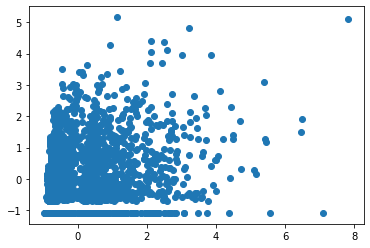

In [29]:
plt.scatter(newdata['Global_active_power'],newdata['Global_reactive_power'])
plt.show()

# Hierarchical Clustering 

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
newdata=data.sample(3000)

In [30]:
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
labels=model.fit_predict(newdata[["Global_active_power","Global_reactive_power"]])

In [31]:
labelstable=pd.DataFrame(labels)
labelstable.head()

,0
0,1
1,1
2,1
3,1
4,1


Text(0, 0.5, 'Global_reactive_power')

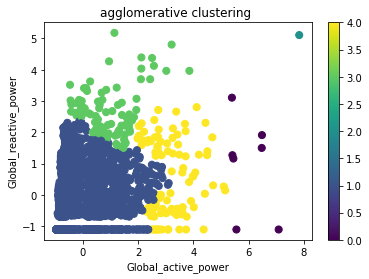

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(newdata["Global_active_power"],newdata["Global_reactive_power"],c=labelstable[0],s=50)
plt.colorbar(scatter)
ax.set_title("agglomerative clustering ")
ax.set_xlabel("Global_active_power")
ax.set_ylabel("Global_reactive_power")

**Reactive Power**

Definition: The power which flows back and forth that means it moves in both the directions in the circuit or reacts upon itself, is called Reactive Power. The reactive power is measured in kilo volt-ampere reactive (kVAR) or MVAR.

**Active Power**

Definition: The power which is actually consumed or utilised in an AC Circuit is called True power or Active power or Real power. It is measured in kilowatt (kW) or MW. It is the actual outcomes of the electrical system which runs the electric circuits or load.

Real power results from energy being used for work or dissipated as heat, reactive power is the result of energy being stored, to establish electric (capacitors) or magnetic (inductors) fields, and later being released back to the source

*with the previous understanding of the meaning of active and reactive power we get the following conclusion :* 

**blue**: families or houses with low energy consumption and low reactive power which is pretty convinient since it saves up energy but it is disadvantageous when it comes to reactive energy because there is not much saved . We can call these the short eyed  

**yellow**: houses with medium energy comsumption and medium reactive power savings , we can call these the average households 

**green** : houses with low energy consumption and high reactive power savings , these houses probably use solar energy and we can call them the planet lovers 

**purple**: houses with high energy consumption and low to medium reactive power savings , those are the squanderers 

**turquoise**: houses with high energy consumption and high reactive power savings , those are the neutrals; they use what they save 

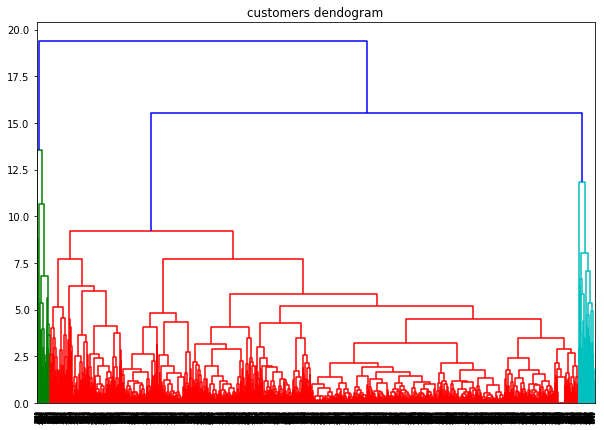

In [33]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("customers dendogram")
dendrogram = sch.dendrogram(sch.linkage(newdata, method='complete'))

# K-means

In [36]:
K=range(1,20)
distances=[]
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(newdata[["Global_active_power","Global_reactive_power"]])
    distances.append(km.inertia_)

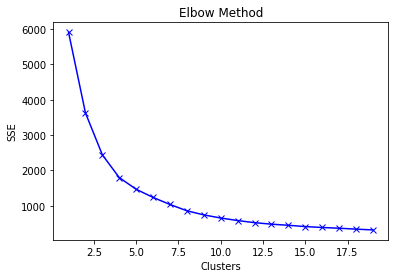

In [37]:
plt.plot(K,distances,"bx-")
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [51]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=0)
km=kmeans.fit(newdata[["Global_active_power","Global_reactive_power"]])

In [52]:
labels=km.labels_
labelstable=pd.DataFrame(labels)

In [53]:
y_kmeans=kmeans.predict(newdata[["Global_active_power","Global_reactive_power"]])
centroids=kmeans.cluster_centers_
centroids

array([[-0.73285473, -0.5071423 ],
       [ 2.70929523,  0.8639423 ],
       [ 0.52867625, -0.50569944],
       [-0.1469199 ,  1.15503549]])

Text(0, 0.5, 'Global_reactive_power')

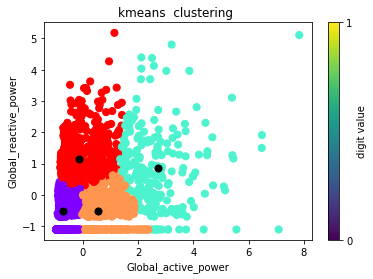

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.scatter(newdata["Global_active_power"],newdata["Global_reactive_power"], c= y_kmeans, s=50,cmap=plt.cm.get_cmap('rainbow', 6))
plt.scatter(centroids[:,0],centroids[:,1],c='k',s=50)
plt.colorbar(ticks=range(6), label='digit value')
ax.set_title("kmeans  clustering ")
ax.set_xlabel("Global_active_power")
ax.set_ylabel("Global_reactive_power")

#### INTERPRETATION AND SOLUTIONS 

**purple**: low energy consumption and low reactive energy consumption , those are the short eyed (because they don't use much energy for now but forget about saving some of it too)

- this category should think of saving energy as well as maintining the same usage level -

**orange**: low energy consumption and medium reactive power savings , these are the rational thinkers 

- One way to tackle this is to try to level up their energy savings -

**red** : low energy consumption and medium to high energy savings , again these use another source of renewed energy and are the planet lovers 

- Just keeping the same attitude would be best , and everyone should do the same -

**blue**:  high energy consumption and low to high energy savings , these can be divided in two categories ; one neutral that saves as much as it uses and another called wasters who spend much without saving 

- it is a must to decrease the use of energy by any means and it is advisable to save as well -

## DBSCAN 

In [68]:
from sklearn.cluster import DBSCAN

In [69]:
model = DBSCAN(eps=0.30, min_samples=9)
labels=model.fit_predict(newdata[["Global_active_power","Global_reactive_power"]])
labelstable=pd.DataFrame(labels)


Text(0, 0.5, 'Global_reactive_power')

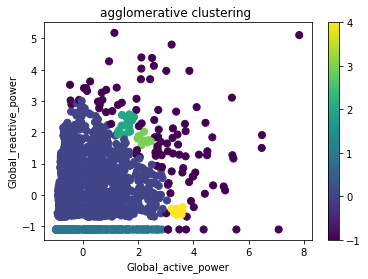

In [70]:
fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(newdata["Global_active_power"],newdata["Global_reactive_power"],c=labelstable[0],s=50)
plt.colorbar(scatter)
ax.set_title("agglomerative clustering ")
ax.set_xlabel("Global_active_power")
ax.set_ylabel("Global_reactive_power")

### ACCURACY COMPARISON 

**note** the closer the model to 0 , the better it is 

In [61]:
from sklearn.metrics import davies_bouldin_score

In [62]:
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
labels=model.fit_predict(newdata[["Global_active_power","Global_reactive_power"]])
labelstable=pd.DataFrame(labels)
davies_bouldin_score(newdata[["Global_active_power","Global_reactive_power"]], labels)

0.730787015826246

In [63]:
kmeans=KMeans(n_clusters=4,random_state=0)
km=kmeans.fit(newdata[["Global_active_power","Global_reactive_power"]])
labels=km.labels_
labelstable=pd.DataFrame(labels)
y_kmeans=kmeans.predict(newdata[["Global_active_power","Global_reactive_power"]])
centroids=kmeans.cluster_centers_
davies_bouldin_score(newdata[["Global_active_power","Global_reactive_power"]], labels)

0.7916303100848245

In [71]:
model = DBSCAN(eps=0.30, min_samples=9)
labels=model.fit_predict(newdata[["Global_active_power","Global_reactive_power"]])
labelstable=pd.DataFrame(labels)
davies_bouldin_score(newdata[["Global_active_power","Global_reactive_power"]], labels)

1.8120896304806056